In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/ex1data2.txt')
df_test = pd.read_csv('data/ex1data3.txt')
df.columns = ['house_size', 'bedrooms','house_price']
df_test.columns = ['house_size', 'bedrooms','house_price']

#print(df)

In [3]:
def extract_test_set(X, Y, n):
    X_new = X[:n-5]
    X_test = X[n-5:]
    
    Y_new = Y[:n-5]
    Y_test = Y[n-5:]
    
    n_new = n - 5
    return X_new, X_test, Y_new, Y_test, n_new

In [4]:
n = df.shape[0]
X = np.hstack(( df.house_size.values.reshape(n, 1), df.bedrooms.values.reshape(n, 1)))  #.astype(float)
Y = df.house_price.values.reshape(n,1)

X_norm = X.copy().astype(float)
mu = X_norm.mean(axis=0)
sigma = X_norm.std(axis=0)

# avoid division by zero
sigma[sigma == 0] = 1  

X = (X_norm - mu) / sigma
X = np.hstack((np.ones((n, 1)), X))


X, X_test, Y, Y_test, n = extract_test_set(X, Y, n)


iterations = 2000
alpha = 0.1

In [11]:
def compute_cost(X, Y, theta):
    n = X.shape[0]           # the shape of X and shape of theta: n x 2 and 2 x 1 --> h must have shape n x 1 
    h = X.dot(theta)
    J = ((1/(2*n)) * np.sum((h-Y) **2))
    return J

In [12]:
def gradient_descent(X, Y):
    n = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    
    for i in range(0, iterations):
        h = X.dot(theta)
        diff_hy = h - Y 
        delta = (1/n) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
    
    return theta

In [13]:
theta = gradient_descent(X,Y)

In [17]:
results =  X_test.dot(theta)
print(results)
print(Y_test)
accuracy = compute_cost(X_test, Y_test, theta)
print(f'The model has reached an accuracy of {accuracy}')

[[415569.09295689]
 [228011.29477683]
 [184629.99438372]
 [314405.01452934]
 [228435.75944156]]
[[314000]
 [299000]
 [179900]
 [299900]
 [239500]]
The model has reached an accuracy of 1571086262.58499


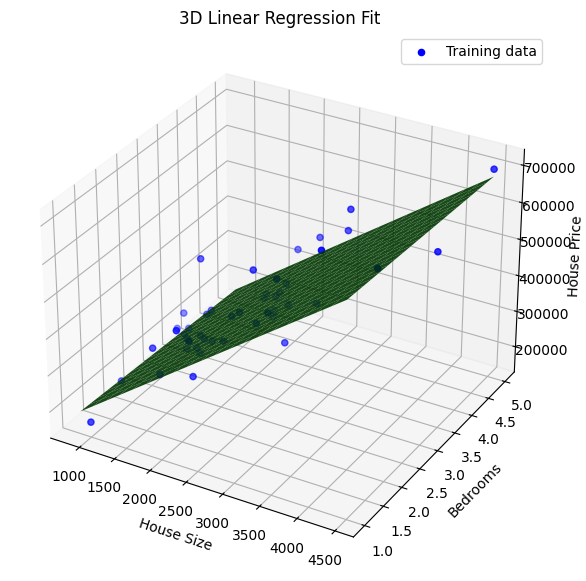

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Extract theta values
theta_0, theta_1, theta_2 = theta.flatten()

# Create a grid for the two features
house_size_range = np.linspace(df.house_size.min(), df.house_size.max(), 20)
bedrooms_range = np.linspace(df.bedrooms.min(), df.bedrooms.max(), 20)
HS_grid, BR_grid = np.meshgrid(house_size_range, bedrooms_range)

# Normalize grid using training mean and std
HS_norm = (HS_grid - mu[0]) / sigma[0]
BR_norm = (BR_grid - mu[1]) / sigma[1]

# Compute predictions on the grid using theta
Y_grid = theta_0 + theta_1 * HS_norm + theta_2 * BR_norm

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter original data
ax.scatter(df.house_size, df.bedrooms, df.house_price, color='blue', label='Training data')

# Plot regression plane
ax.plot_surface(HS_grid, BR_grid, Y_grid, color='green', alpha=0.9)

ax.set_xlabel('House Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('House Price')
ax.set_title('3D Linear Regression Fit')
ax.legend()
plt.show()
